
-----------------

<img src = 'https://github.com/HeyangGong/datasharing/blob/master/logo1.jpg?raw=true', width = 80, align = 'left' >
<br>
<br>
&nbsp; *巡洋舰深度训练营材料* 

----------------------------------------




# Quick start  

线性回归模型

![](mindmap.png)

线性回归是机器学习最基础的算法，也是使用范围最广泛的机器学习算法， 通过线性回归这个模型，大家可以了解如何构建一个最简单的机器学习模型。

我们将用最简单的 Kaggle 房价数据，让你了解如何用模型从数据中提取洞见，进行预测。 

所谓回归问题， 是指从一组特征，预测另一个连续的特征，比如价格。 线性回归 ，是最简单的回归模型，
假定特征到预测目标具有线性关系

Simple linear regression

<img src= 'images/10_01.png',width = 500>

多元线性回归


<img src= 'images/10_15.png',width = 800>

# 从房价数据详解

引入房价数据集

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')
print(data.shape, data.shape)
data.head()

(1460, 81) (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##  数据预处理

数太大，归一化，让数据的分布处于同一区间, 我们选择一种最简单的数据调整方法，每个数除以其最大值。

In [7]:
# 选择数据集合中的几个重要的特征
data_select = data[['BedroomAbvGr','LotArea','Neighborhood', 'SalePrice']]
data_select = data_select.rename(columns = {'BedroomAbvGr':'room', 'LotArea':'area'})
data_select = data_select.dropna(axis = 0)
for col in np.take(data_select.columns,[0,1,-1]):
    data_select[col] /= data_select[col].max()
data_select.head()

,room,area,Neighborhood,SalePrice
0,0.375,0.039258,CollgCr,0.276159
1,0.375,0.044600,Veenker,0.240397
2,0.375,0.052266,CollgCr,0.296026
3,0.375,0.044368,Crawfor,0.185430
4,0.500,0.066250,NoRidge,0.331126


In [8]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data_select.copy(), test_size = 0.9)

In [6]:
train.describe()

,room,area,SalePrice
count,146.000000,146.000000,146.000000
mean,0.359589,0.051244,0.249041
std,0.090366,0.044946,0.113547
min,0.125000,0.007122,0.074163
25%,0.250000,0.036979,0.172185
50%,0.375000,0.045390,0.223179
75%,0.375000,0.056857,0.291225
max,0.625000,0.534967,0.735099


## 构建模型


### 线性回归模型 

从最简单的情况出发，构建一台预测价格的机器，假设函数 $h(\bf{x}) = \bf{w} \bf{x} +b$ 是线性的。

In [9]:
def linear(features, pars):
    price = np.sum(features*pars[:-1], axis = 1) + pars[-1]
    return price

### 模型测试

试一试你的模型预测价格， 和真实价格做比较

In [10]:
# par1 = 0.1, par2 = 0.1
train['predict'] = linear(train[['room', 'area']].values, np.array([0.1, 0.1, 0.0]))
train.head()

,room,area,Neighborhood,SalePrice,predict
673,0.375,0.067096,Crawfor,0.341060,0.044210
1285,0.500,0.027875,BrkSide,0.175497,0.052788
121,0.375,0.028154,IDOTRR,0.132450,0.040315
1083,0.375,0.040884,NAmes,0.211921,0.041588
876,0.375,0.117475,Mitchel,0.175166,0.049248


可以看到，在该参数下，模型的预测价格和真实价格有较大的差距。那么寻找合适的参数值是我们需要做的事情。

### 代价函数

预测函数为  $h(\bf{x}) = \bf{w} \bf{x} +b$

度量预测错误，代价函数是误差平方和。


![](formula.jpg)


（这里不是 1/2)

In [11]:
def mean_squared_error(y_pred , y):
    return sum(np.array( y_pred - y ) ** 2)
    
def Cost(df, features, pars):
    df['predict'] = linear(df[features].values, pars)
    cost = mean_squared_error(df.predict, df.SalePrice)/len(df)
    return cost

cost=Cost(train,['room', 'area'], np.array([0.1, 0.1, 0.0]))
print (cost)

0.0569567492889


### 暴力搜索 

我们需要找到一组参数，线性回归模型的代价最少！ 

最简单的办法是用格点搜索法。为了减少yan'sua演算时间， 假设模型的截距项b = 0

In [12]:
Xs = np.linspace(0, 1, 100)
Ys = np.linspace(0, 1, 100)
Zs = np.zeros([100,100])

Xs,Ys = np.meshgrid(Xs,Ys)
Xs.shape, Ys.shape

((100, 100), (100, 100))

In [17]:

W1=[]
W2=[]
Costs =[]
for i in range (100):
    for j in range(100):
            W1.append(0.01*i)
            W2.append(0.01*j)
            Costs.append(Cost(train,['room', 'area'], np.array([0.01*i, 0.01*j, 0.])))
index = np.array(Costs).argmin()

In [18]:
print (W1[index], W2[index],Costs[index])

0.5700000000000001 0.45 0.0162772500137


Text(0.5,0,'lotArea')

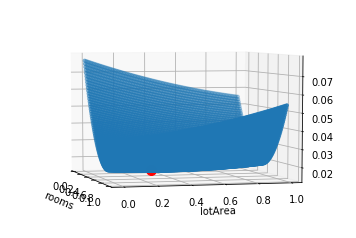

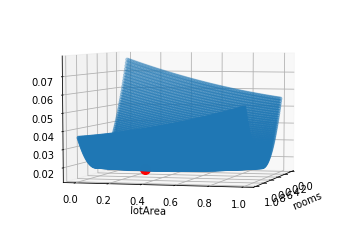

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()                                                                                                         
ax=fig.add_subplot(111,projection='3d')
ax.view_init(5,-15)
ax.scatter(W1,W2,Costs,s=10)
ax.scatter(0.58, 0.28, zs = Cost(train,['room', 'area'], np.array([0.58, 0.28, 0.0]) ), s=100,
           color='red')
plt.xlabel('rooms')
plt.ylabel('lotArea')

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.view_init(5,15)
ax.scatter(W1,W2,Costs,s=10)
ax.scatter(0.58, 0.28, zs = Cost(train,['room', 'area'], np.array([0.58, 0.28, 0.0]) ), s=100,
           color='red')
plt.xlabel('rooms')
plt.ylabel('lotArea')

从中可以看出我们格点搜索出来的点，确实具备有更小的 Cost.

### 梯度下降法

格点搜索法计算量通常很大，更多时候，尤其是在参数很多的时候，一般用梯度下降法。

![](http://7xivgs.com1.z0.glb.clouddn.com/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%9501.jpeg)

In [11]:
# pars 是 w和b的总和
def gradient(train,features, pars):
    Gradient = np.zeros(len(pars))
    for i in range(len(pars)):
        pars_new = pars.copy()
        pars_new[i] += 0.01 
        Gradient[i] = (Cost(train, features, pars_new) - Cost(train,features, pars))/0.01
    return Gradient
gradient(train, ['room', 'area'],[0.2, 0.1, 0])

array([-0.12062854, -0.01706893, -0.32515586])

In [12]:
def GradientDescent(data, epochs, lr, features, pars):
    Costs = []
    for i in range (epochs):
        grad = gradient(data, features, pars)
        if i%50 == 0:
            Costs.append(Cost(data, features, pars))
        pars -= grad*lr
    print ('w = ', pars)
    return pars, Costs

In [1]:
pars,Costs = GradientDescent(train, 500, 0.002,['room', 'area'],[0.1, 0.1, 0] )

NameError: name 'GradientDescent' is not defined

查看梯度下降的过程

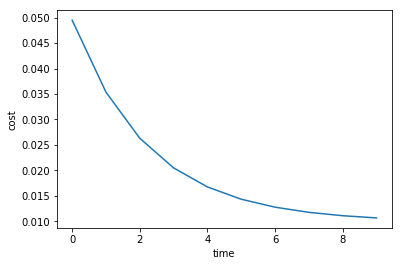

In [16]:
plt.plot(Costs)
plt.xlabel('time')
plt.ylabel('cost')

## 预测和模型评估

用学习出来的模型做预测

In [17]:
cost = Cost(train,['room', 'area'], pars)
cost

0.010393847591213893

> 我们查看预测的均方误差

In [18]:
from sklearn.metrics import mean_squared_error
train['predict'] = linear(train[['room', 'area']].values, pars )
print('MSE train: %.3f' % (mean_squared_error(train['SalePrice'], train['predict'])))
train.head()

MSE train: 0.010


,room,area,Neighborhood,SalePrice,predict
393,0.250,0.034593,BrkSide,0.132450,0.196734
1355,0.500,0.047351,NWAmes,0.225166,0.237517
1169,0.500,0.166136,NoRidge,0.827815,0.250604
1125,0.250,0.048475,NAmes,0.152318,0.198264
665,0.375,0.052006,Gilbert,0.305298,0.218341


In [19]:
test['predict'] = linear(test[['room', 'area']].values, pars)
print('MSE test: %.3f' % (mean_squared_error(test['SalePrice'], test['predict'])))
test.head()

MSE test: 0.011


,room,area,Neighborhood,SalePrice,predict
35,0.500,0.062338,NridgHt,0.409272,0.239168
552,0.375,0.051783,NridgHt,0.338411,0.218317
30,0.375,0.039490,IDOTRR,0.052980,0.216962
1136,0.375,0.044600,NAmes,0.157616,0.217525
1309,0.375,0.033232,SawyerW,0.237351,0.216273


In [20]:
cost = Cost(test,['room', 'area'], pars)
cost

8.5112068780221547e-06

## 如何做的更好

结果是否理想， 能够如何优化，是否存在一个模型，使得误差为0？ 增加特征试一试！ 

我们把之前的模型封装起来 ， 并且使用公式运算梯度， 比较一下和之前的速度差别！  

In [14]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[:-1] += self.eta * X.T.dot(errors)
            self.w_[-1] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return self.net_input(X)

In [30]:
data_select = pd.get_dummies(data_select)
train, test = train_test_split(data_select.copy(), test_size = 0.9)

In [31]:
train_ = train.copy()
train_y = train_.pop('SalePrice')
train_x = train_
test_ = test.copy()
test_y = test_.pop('SalePrice')
test_x = test_

In [32]:
train_x.head()

,room,area,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
1027,0.375,0.044229,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
971,0.250,0.010537,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1263,0.375,0.062789,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,0.375,0.047560,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,0.375,0.053093,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
lr = LinearRegressionGD(n_iter = 1000)
lr.fit(train_x.values, train_y.values)

In [34]:
lr.w_

array([ 0.16957942,  0.11021259,  0.07283424,  0.        ,  0.        ,
       -0.03630987,  0.        ,  0.01206874, -0.01824598, -0.05875296,
        0.0371777 , -0.11406127, -0.09546194, -0.00494957, -0.0445464 ,
        0.        , -0.00347876,  0.07656929,  0.15226783, -0.07335475,
       -0.09810451, -0.05145496,  0.00291665,  0.05571057,  0.25369805,
        0.09081152,  0.01670988,  0.1720435 ])

In [35]:
from sklearn.metrics import mean_squared_error
train['predict'] = lr.predict(train_x.values)

In [36]:
print('MSE train: %.3f' % (mean_squared_error(train_y, train['predict'])))
train.head()

MSE train: 0.003


,room,area,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,predict
1027,0.375,0.044229,0.388181,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.331322
971,0.250,0.010537,0.229139,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.367867
1263,0.375,0.062789,0.239073,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.206246
965,0.375,0.047560,0.236954,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.278055
468,0.375,0.053093,0.331126,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.393755


In [37]:
test['predict'] = lr.predict(test_x.values)
print('MSE test: %.3f' % (mean_squared_error(test_y, test['predict'])))
test.head()

MSE test: 0.006


,room,area,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,predict
1240,0.375,0.037901,0.297881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.251882
1230,0.500,0.087760,0.251656,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.215051
1406,0.250,0.039234,0.176159,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.230831
815,0.375,0.056387,0.297881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.253919
907,0.375,0.053427,0.331126,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.223278


** 效果好了很多， 思考， 错误能不能降低到0？ 为什么测试误差的下降没有那么快？ **